Assignment 1 , 23116006 , Akhil Jaiswal

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory




In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
columns = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status",
           "occupation", "relationship", "race", "sex","capital_gain","capital_loss",
           "hours_per_week", "native_country", "income"]

In [6]:
df = pd.read_csv("adult.csv", names=columns, na_values=" ?", skipinitialspace=True)  # Handle missing values

In [7]:
numerical_cols = ["age", "fnlwgt", "education_num","hours_per_week"]
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

### DATA CLEANING

In [ ]:
df.dropna(inplace=True) # Dropping missing values

In [ ]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1,25.0,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40.0,United-States,<=50K
2,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50.0,United-States,<=50K
3,28.0,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40.0,United-States,>50K
4,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40.0,United-States,>50K
5,18.0,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0,0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,27.0,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38.0,United-States,<=50K
48839,40.0,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40.0,United-States,>50K
48840,58.0,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40.0,United-States,<=50K
48841,22.0,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0,0,20.0,United-States,<=50K


In [ ]:
df.drop_duplicates(inplace=True) #Dropping duplicate values

In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [ ]:
for col in numerical_cols:
    df = remove_outliers(df, col)

In [ ]:
for col in ["workclass", "education", "marital_status", "occupation",
            "relationship", "race", "sex", "native_country", "income"]:
    df[col] = df[col].str.lower().str.strip()

In [ ]:
df.shape

(32942, 15)

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1,25.0,private,226802.0,11th,7.0,never-married,machine-op-inspct,own-child,black,male,0,0,40.0,united-states,<=50k
2,38.0,private,89814.0,hs-grad,9.0,married-civ-spouse,farming-fishing,husband,white,male,0,0,50.0,united-states,<=50k
3,28.0,local-gov,336951.0,assoc-acdm,12.0,married-civ-spouse,protective-serv,husband,white,male,0,0,40.0,united-states,>50k
4,44.0,private,160323.0,some-college,10.0,married-civ-spouse,machine-op-inspct,husband,black,male,7688,0,40.0,united-states,>50k
7,29.0,?,227026.0,hs-grad,9.0,never-married,?,unmarried,black,male,0,0,40.0,united-states,<=50k


# **UNIVARIATE ANALYSIS**

1. NUMERICAL DATA

In [ ]:
df.describe()

,age,fnlwgt,education_num,hours_per_week
count,32942.000000,32942.000000,32942.000000,32942.000000
mean,38.650568,180383.207577,10.369012,41.598415
std,12.133153,86842.280208,2.197141,4.039724
min,17.000000,13769.000000,5.000000,33.000000
25%,29.000000,117062.500000,9.000000,40.000000
50%,37.000000,176321.000000,10.000000,40.000000
75%,47.000000,229244.250000,13.000000,43.000000
max,78.000000,417668.000000,16.000000,52.000000


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

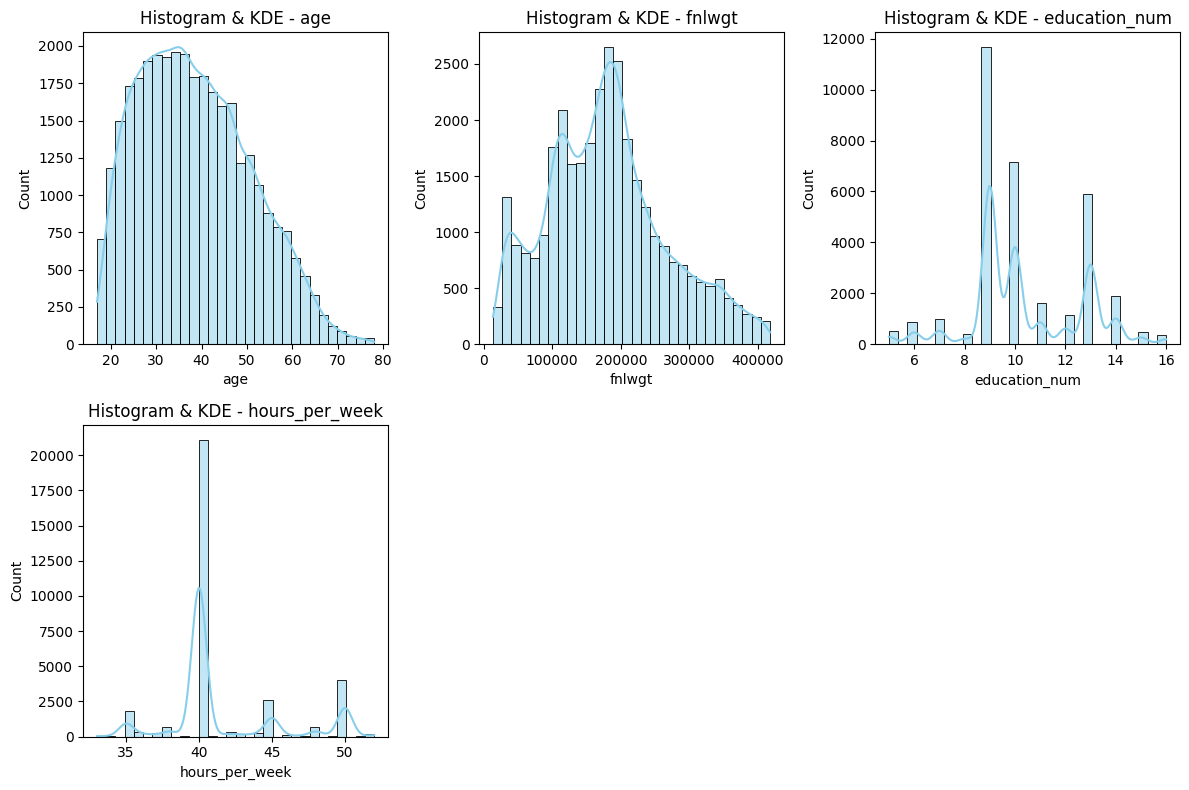

In [ ]:
plt.figure(figsize=(12, 8))

# Loop through each numerical column
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)  # Adjust subplot layout dynamically
    sns.histplot(df[col], kde=True, bins=30, color="skyblue", edgecolor="black")  # Histogram with KDE
    plt.title(f"Histogram & KDE - {col}")

plt.tight_layout()
plt.show()


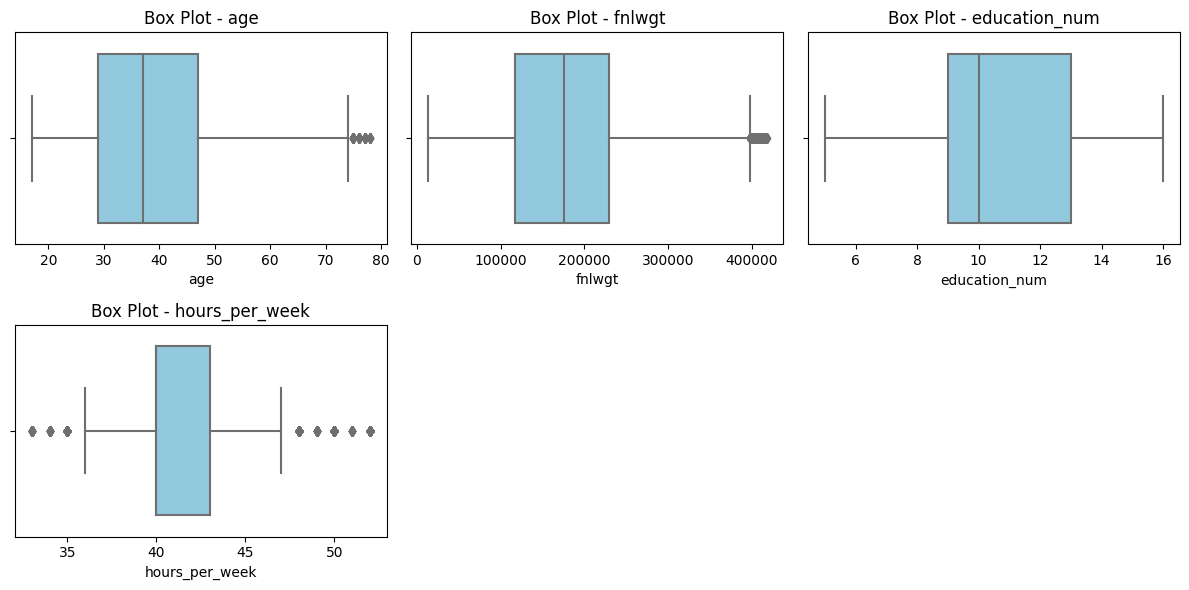

In [ ]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Box Plot - {col}")
plt.tight_layout()
plt.show()


2. CATEGORICAL DATA

In [ ]:
categorical_cols=["workclass", "education", "marital_status", "occupation",
            "relationship", "race", "sex", "native_country", "income"]

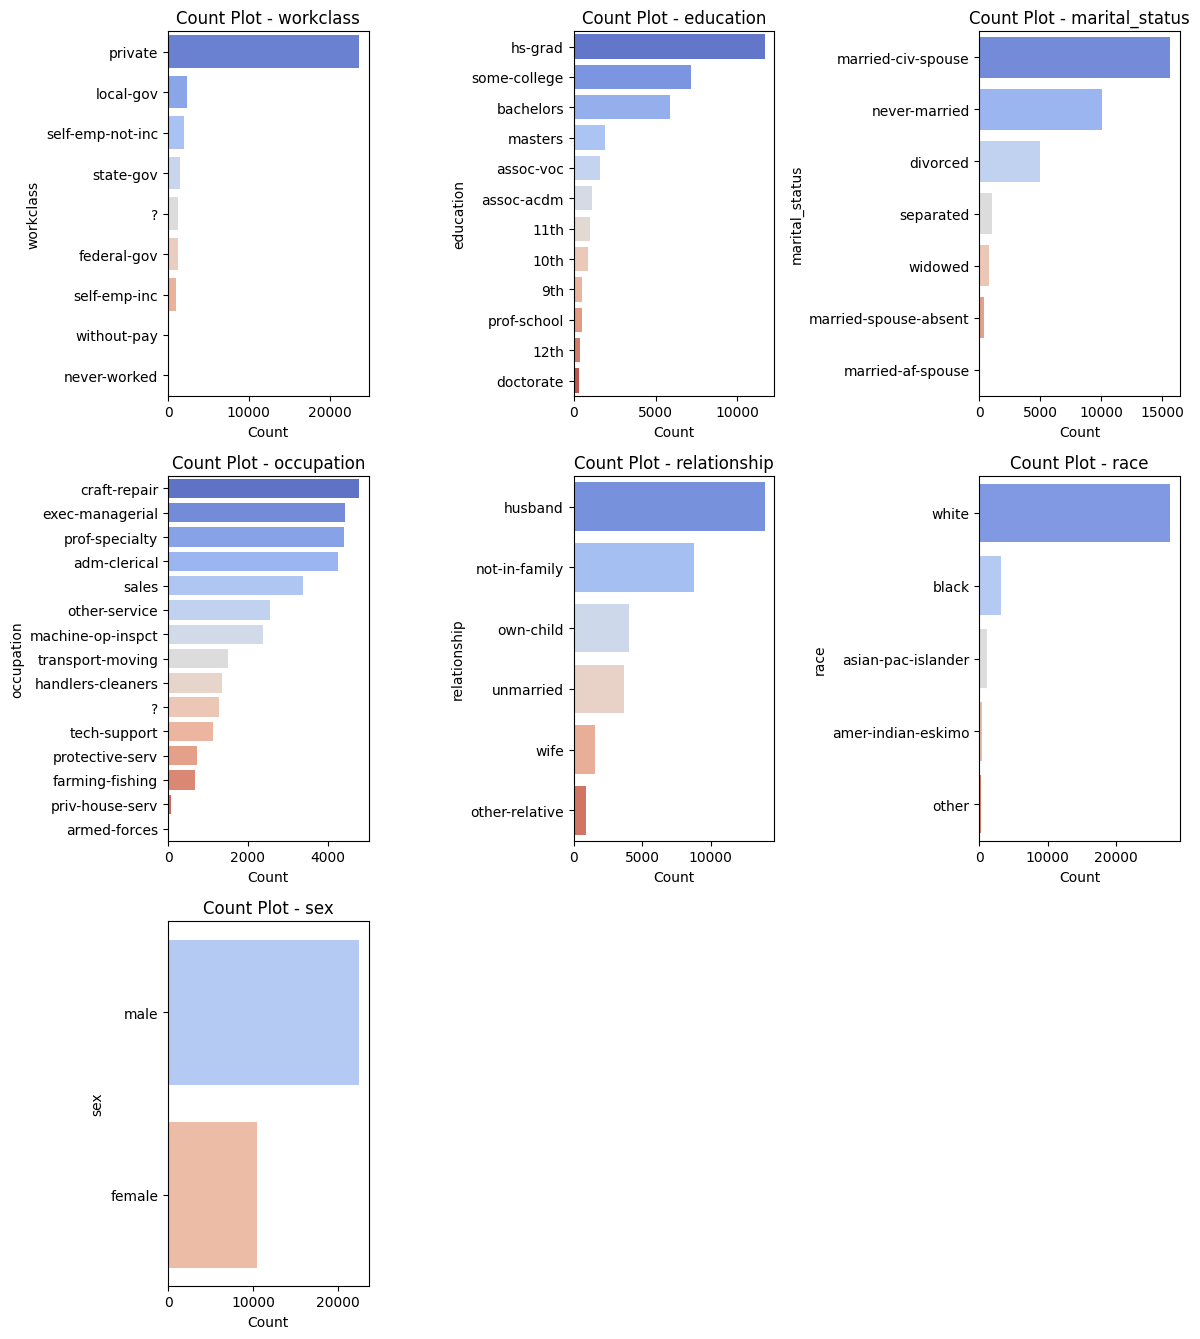

In [ ]:

plt.figure(figsize=(12, len(categorical_cols) * 1.5))  # Dynamically adjust height

rows = (len(categorical_cols) // 3) + (len(categorical_cols) % 3 > 0)  # Adjust rows
cols = 3  # Keep 3 columns for better visualization

for i, col in enumerate(categorical_cols[:-2]):
    plt.subplot(rows, cols, i+1)  # Adjust rows dynamically
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette="coolwarm")
    plt.title(f"Count Plot - {col}")
    plt.xlabel("Count")

plt.tight_layout()
plt.show()



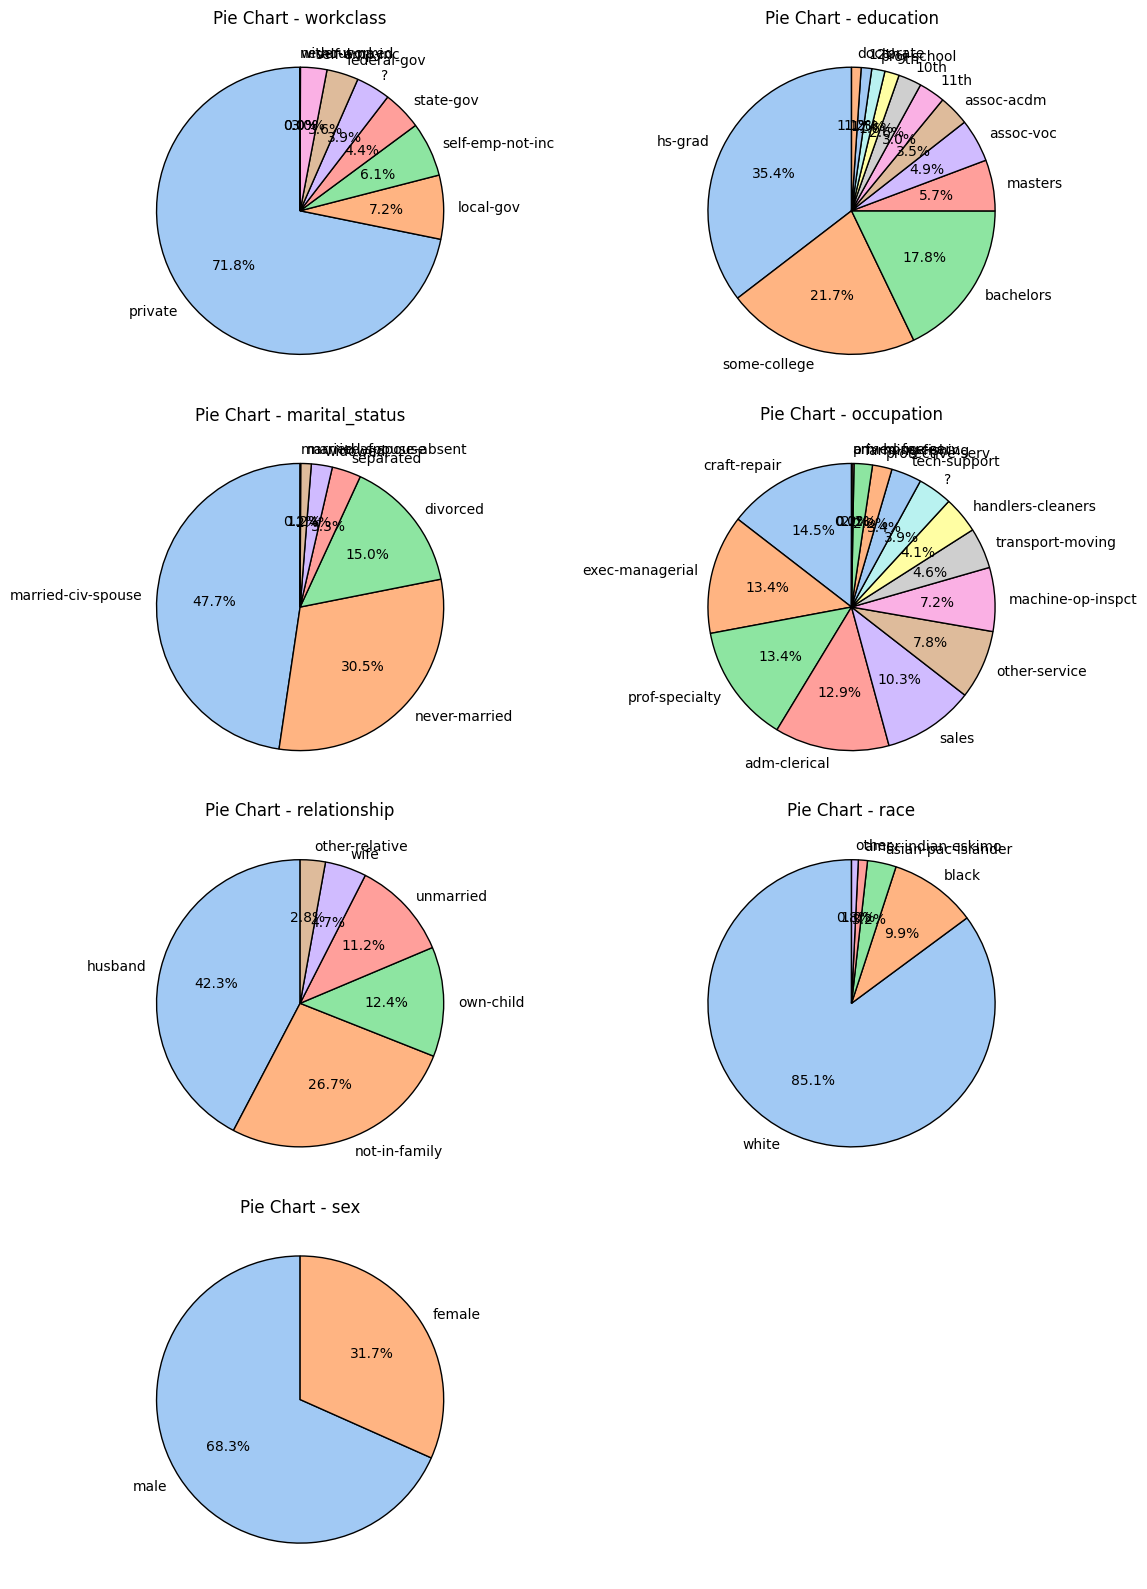

In [ ]:
categorical_cols_filtered = [col for col in categorical_cols if col != "native_country"]


num_cols = 2
num_rows = (len(categorical_cols_filtered) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 4))


axes = axes.flatten()

for i, col in enumerate(categorical_cols_filtered[:-1]):
    df[col].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("pastel"),
                                    startangle=90, ax=axes[i], wedgeprops={'edgecolor': 'black'})
    axes[i].set_title(f"Pie Chart - {col}")
    axes[i].set_ylabel("")  # Hide y-axis label


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# **BIVARIATE ANALYSIS**

1) Correlation Heatmap


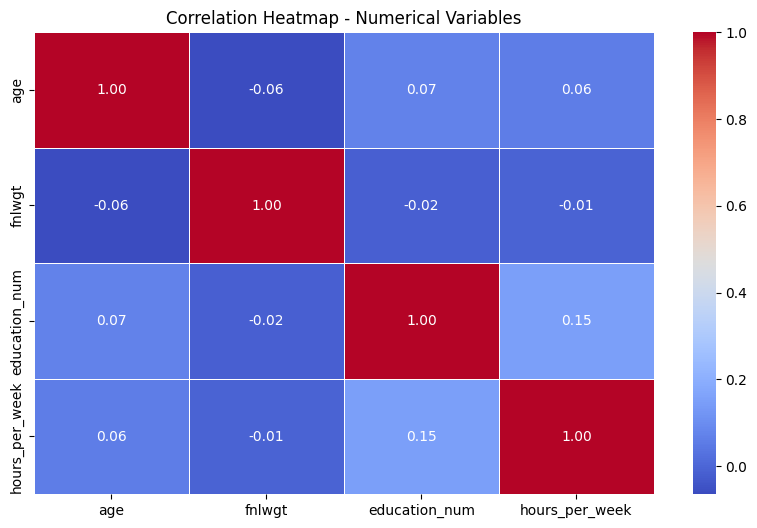

In [ ]:

plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap - Numerical Variables")
plt.show()


In [ ]:
2) Scatter plots


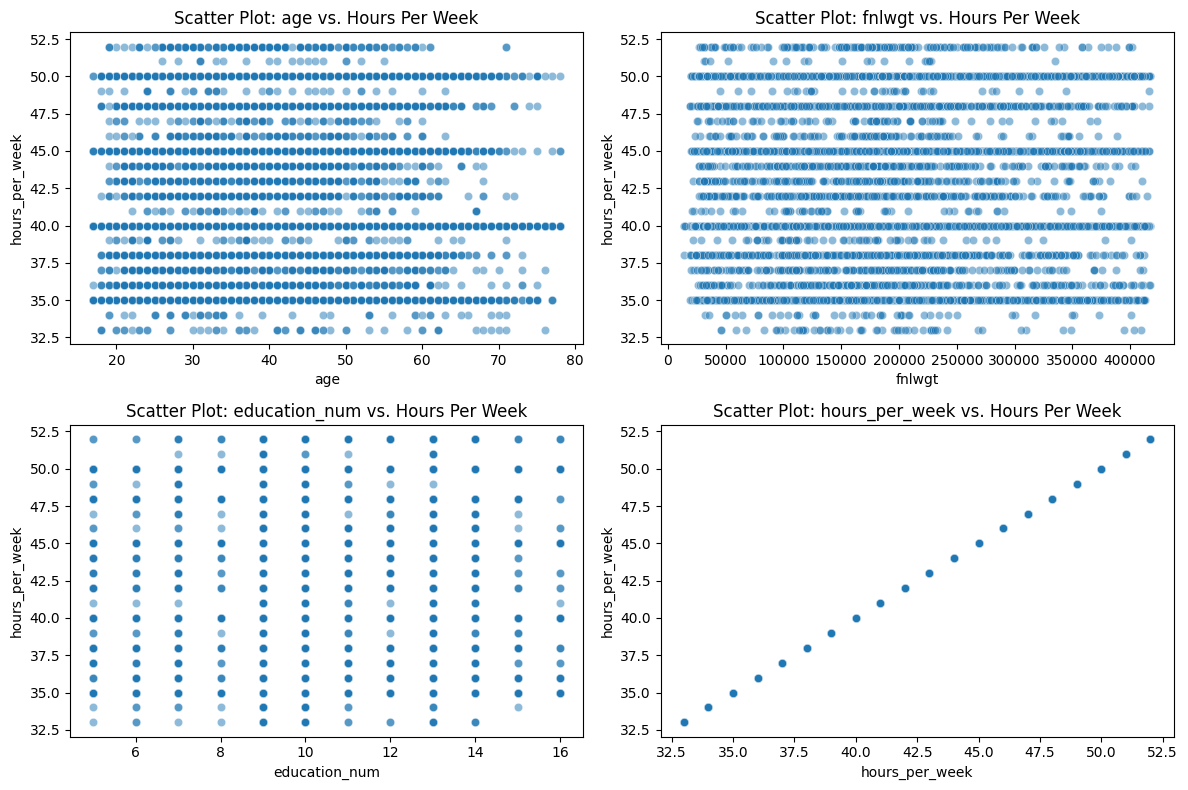

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols[:4]):  # Limit to first 4 for readability
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=df[col], y=df["hours_per_week"], alpha=0.5)
    plt.title(f"Scatter Plot: {col} vs. Hours Per Week")

plt.tight_layout()
plt.show()


In [ ]:
3) Box plot

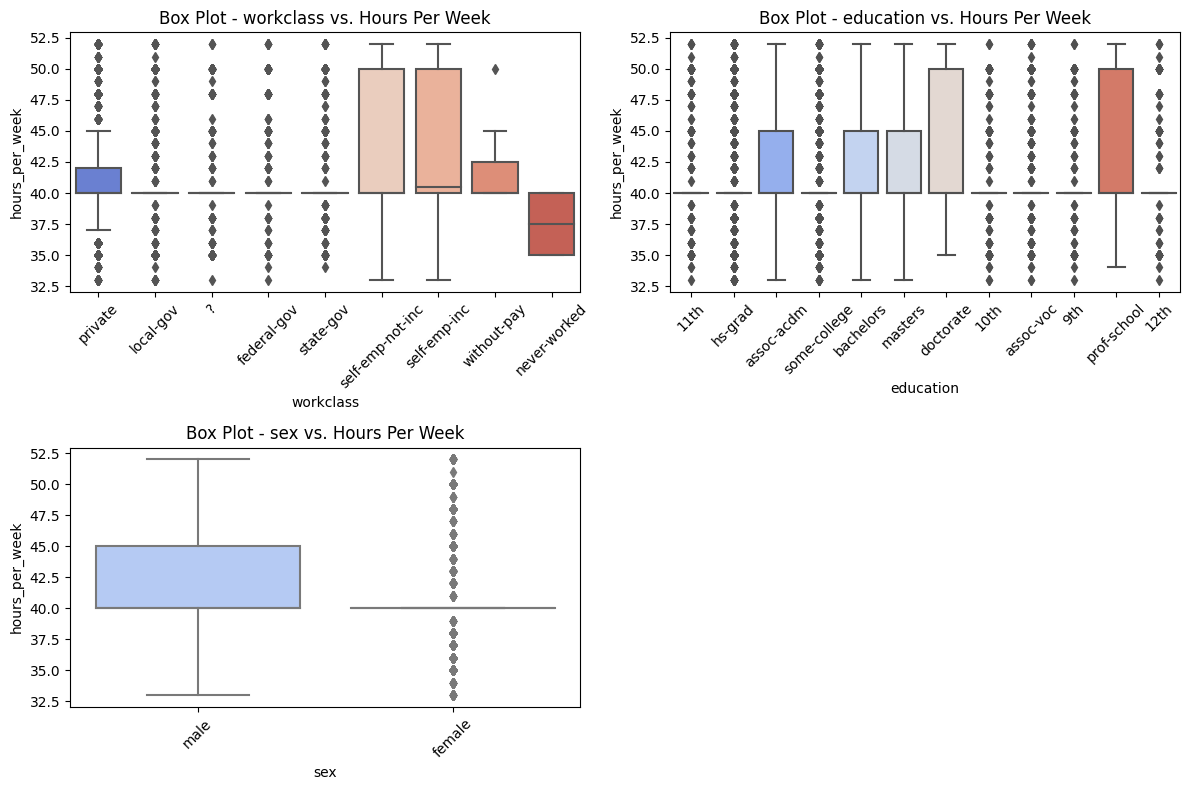

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(["workclass", "education", "sex"]):  # Select key categorical variables
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df[col], y=df["hours_per_week"], palette="coolwarm")
    plt.xticks(rotation=45)
    plt.title(f"Box Plot - {col} vs. Hours Per Week")

plt.tight_layout()
plt.show()


In [9]:
#4) Voilin plot

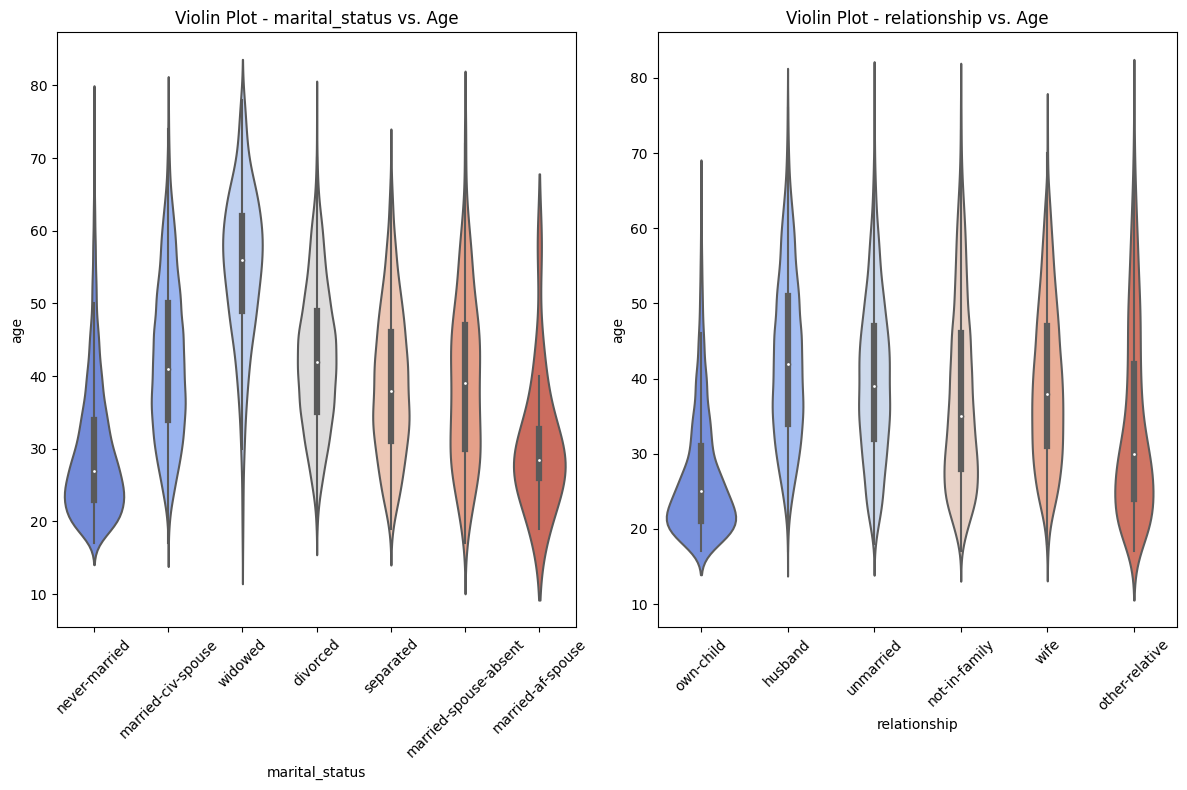

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(["marital_status", "relationship"]):  # Select key categorical variables
    plt.subplot(1, 2, i+1)
    sns.violinplot(x=df[col], y=df["age"], palette="coolwarm")
    plt.xticks(rotation=45)
    plt.title(f"Violin Plot - {col} vs. Age")

plt.tight_layout()
plt.show()


In [ ]:
5) Stacked bar chart

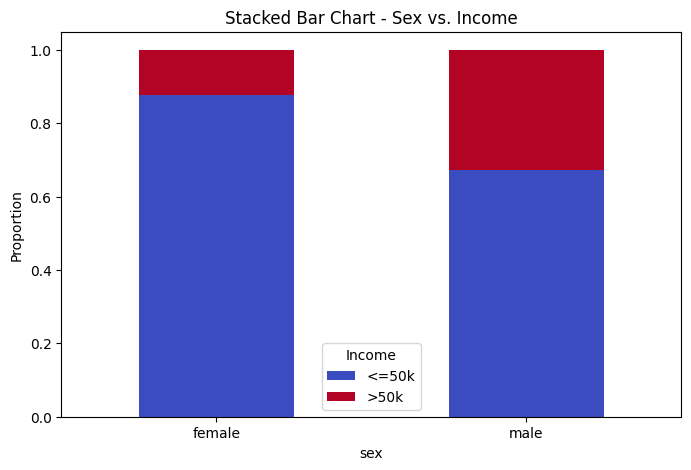

In [ ]:
cross_tab = pd.crosstab(df["sex"], df["income"], normalize="index")  # Normalize by row
cross_tab.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(8, 5))
plt.title("Stacked Bar Chart - Sex vs. Income")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.legend(title="Income")
plt.show()


In [ ]:
6) Categorical heatmap

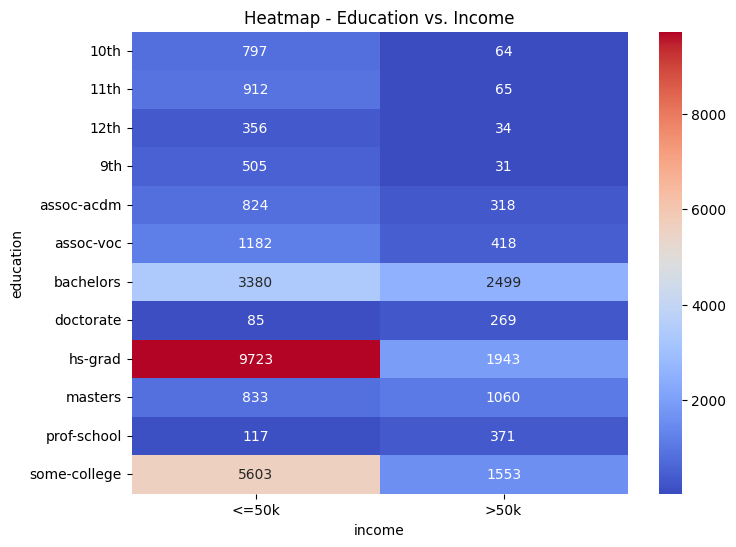

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(df["education"], df["income"]), cmap="coolwarm", annot=True, fmt="d")
plt.title("Heatmap - Education vs. Income")
plt.show()


# **MULTIVARIATE ANALYSIS**


In [ ]:
1) Pairplot (Scatterplot Matrix)

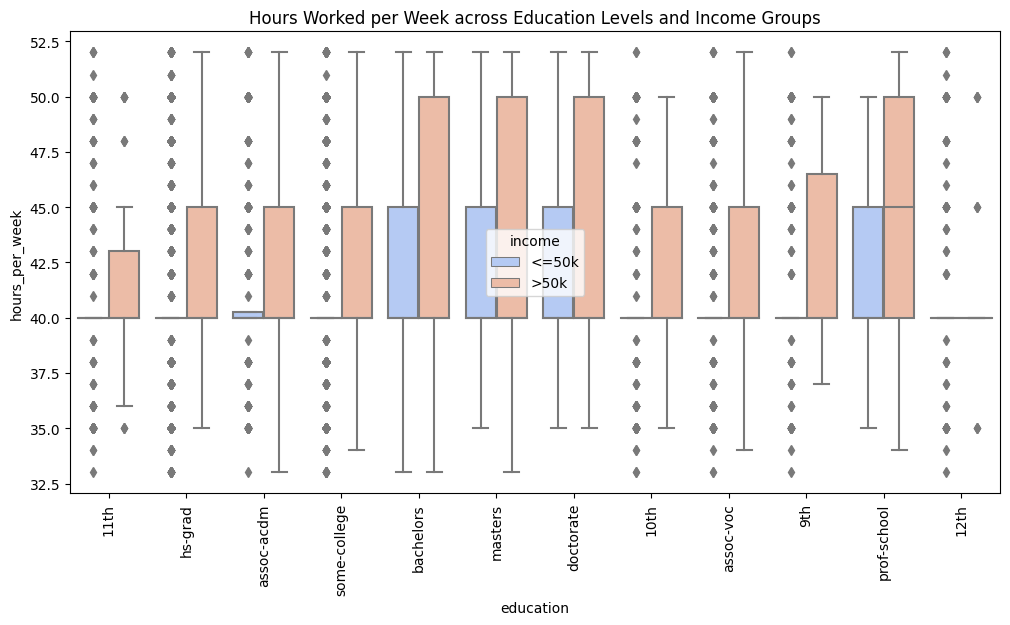

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="education", y="hours_per_week", hue="income", data=df, palette="coolwarm")
plt.xticks(rotation=90)  # Rotate labels for readability
plt.title("Hours Worked per Week across Education Levels and Income Groups")
plt.show()

2) 3d scatter plot

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df, x='age', y='hours_per_week', z='capital_gain',
                     color='income', opacity=0.7, title="3D Scatter Plot")
fig.show()


3) Cluster bar chart

<Figure size 1200x600 with 0 Axes>

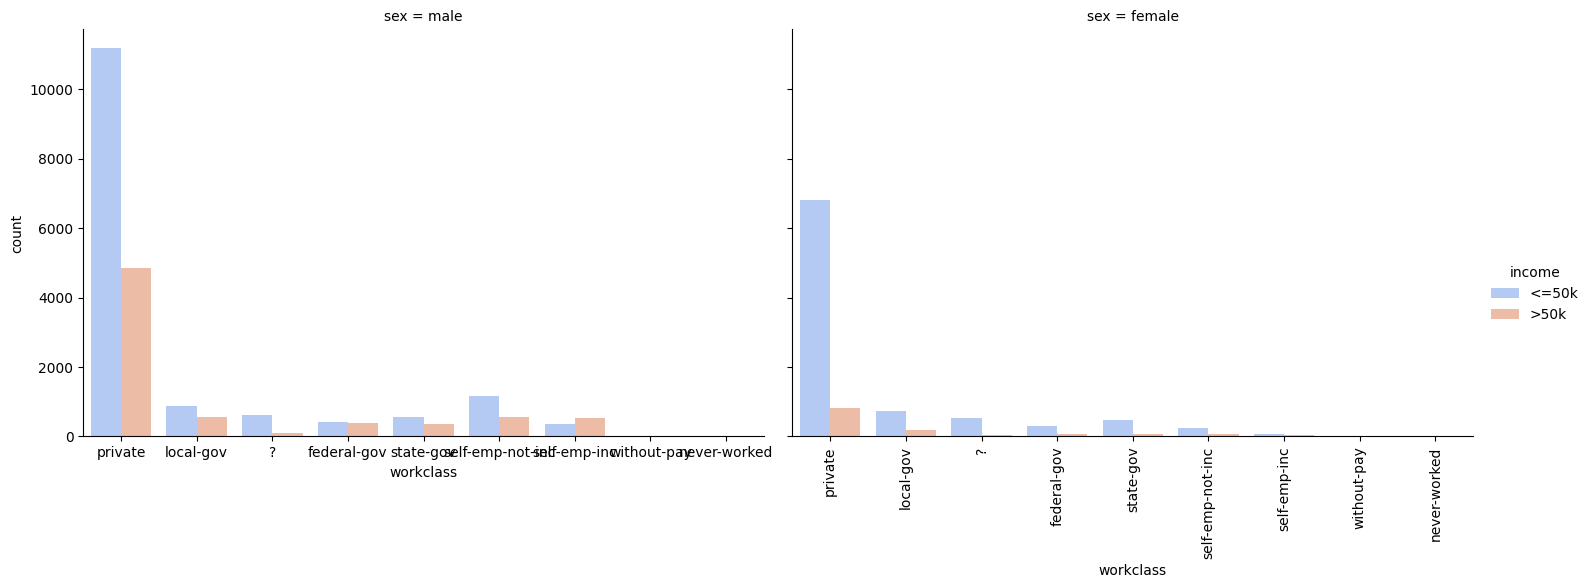

In [ ]:
plt.figure(figsize=(12, 6))
sns.catplot(x="workclass", hue="income", col="sex", data=df, kind="count", height=5, aspect=1.5, palette="coolwarm")
plt.xticks(rotation=90)
plt.show()
